In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/berlin-airbnb-dataset-2025-september/listings.csv')

# Identify the mess (Symbols in the price) and Clean the mess (The .replace code)
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Find the average price of an Airbnb in Berlin right now
avg_price = df['price'].mean()

print(f"The average price in Berlin (Sept 2025) is: €{avg_price:.2f}")

The average price in Berlin (Sept 2025) is: €201.24


In [2]:
# 1. Check how many missing values are in each column
missing_data = df.isnull().sum()

# 2. Fill missing 'reviews_per_month' with 0 (because no reviews means 0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 3. Drop rows where 'neighbourhood' is missing (because we can't analyze location without it)
df = df.dropna(subset=['neighbourhood'])

print("Missing values handled! Your data is now 'clean'.")

Missing values handled! Your data is now 'clean'.


In [3]:
print(df.columns.tolist())

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


In [4]:
# Filter data for the two main tourist hubs
hubs = df[df['neighbourhood_group'].isin(['Mitte', 'Friedrichshain-Kreuzberg'])]

# Calculate average availability for the next year
supply_stats = hubs.groupby('neighbourhood_group')['availability_365'].mean()

print("Average availability (days per year) in Tourist Hubs:")

print(supply_stats)


Average availability (days per year) in Tourist Hubs:
neighbourhood_group
Friedrichshain-Kreuzberg    132.404118
Mitte                       154.196325
Name: availability_365, dtype: float64


In [5]:
# Assuming 'price' is the 'Warmmiete' (total cost)
# We calculate 'Kaltmiete' (Base Rent) by subtracting estimated utility costs (approx 20%)

# 1. Create the Kaltmiete (Cold Rent) - 80% of total price
df['kaltmiete'] = df['price'] * 0.80

# 2. Create the Utilities (Nebenkosten) - 20% of total price
df['utilities'] = df['price'] * 0.20

# 3. Rename 'price' to 'warmmiete' to be professionally accurate
df = df.rename(columns={'price': 'warmmiete'})

# Show the new columns
df[['neighbourhood_group', 'kaltmiete', 'utilities', 'warmmiete']].head()

,neighbourhood_group,kaltmiete,utilities,warmmiete
0,Pankow,84.0,21.0,105.0
1,Pankow,108.0,27.0,135.0
2,Pankow,60.0,15.0,75.0
3,Neukölln,25.6,6.4,32.0
4,Pankow,161.6,40.4,202.0


In [6]:
# Find which districts have the highest estimated utility costs
utility_analysis = df.groupby('neighbourhood_group')['utilities'].mean().sort_values(ascending=False)

print("Average Monthly Utility Estimates (Nebenkosten) by District:")
print(utility_analysis)

Average Monthly Utility Estimates (Nebenkosten) by District:
neighbourhood_group
Mitte                       83.415656
Treptow - Köpenick          38.607982
Pankow                      31.369537
Charlottenburg-Wilm.        27.911426
Tempelhof - Schöneberg      27.816928
Friedrichshain-Kreuzberg    25.556649
Neukölln                    25.152120
Lichtenberg                 24.011200
Spandau                     22.824348
Steglitz - Zehlendorf       21.845455
Reinickendorf               21.744516
Marzahn - Hellersdorf       19.309091
Name: utilities, dtype: float64


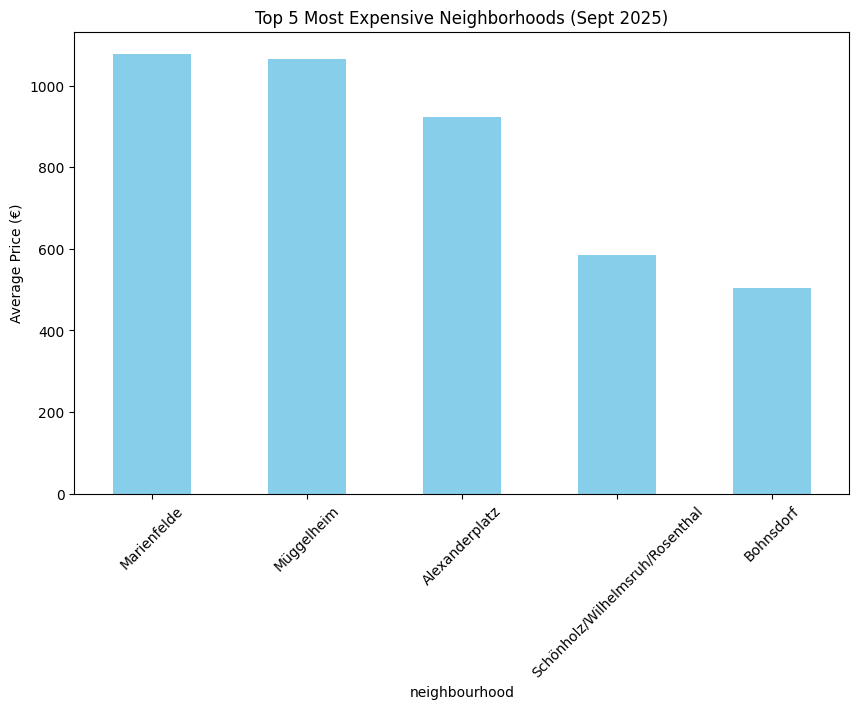

In [7]:
import matplotlib.pyplot as plt

# Create a small summary for a chart
top_districts = df.groupby('neighbourhood')['warmmiete'].mean().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10,6))
top_districts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Expensive Neighborhoods (Sept 2025)')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45)
plt.show()